# Learning image classification
## This is based on Chap 10 of Hands on ML 3rd Ed

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [11]:
# scale from 0 to 255 to 0 to 1
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Define class names for the mnist categories

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
class_names[y_train[0]]

'Coat'

### Create model

In [14]:
# Sequential model - single stack of layers connected sequentially
model = keras.models.Sequential()
# convert each input image to 1D array, computes X.reshape(-1,1) which had to be done manually before
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 3 dense layers, first 2 are hidden layers with relu, last is output layer with 10 categories with softmax
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
# Can also do in one step like
# model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]), keras.layers.Dense etc])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Dense layers have a lot of parameters, risk overfitting if not enough training data

In [16]:
hidden1 = model.layers[1]

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
# Weights are randomly initialized and biases set as zero
weights

array([[ 0.05889556, -0.01728607, -0.01543814, ..., -0.0640739 ,
         0.03558524, -0.03838158],
       [-0.0163474 ,  0.0392997 ,  0.01788971, ..., -0.05465753,
         0.04231243,  0.00677531],
       [ 0.03616764,  0.00024474,  0.07408209, ..., -0.05872642,
        -0.06016412,  0.06883426],
       ...,
       [ 0.06844144,  0.06638518, -0.03785073, ...,  0.01913673,
        -0.04337642,  0.02220641],
       [-0.03506107, -0.06021196,  0.02244919, ..., -0.01935177,
         0.00425102, -0.00253573],
       [-0.02962422,  0.01898752,  0.03496083, ...,  0.00025596,
         0.05221082,  0.05108778]], dtype=float32)

### Compile the model

In [19]:
# more info at - keras.io/losses,  keras.io/optimizers and keras.io/metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 169us/sample - loss: 0.7165 - accuracy: 0.7667 - val_loss: 0.5146 - val_accuracy: 0.8214
Epoch 2/30
55000/55000 [==============================] - 8s 150us/sample - loss: 0.4849 - accuracy: 0.8319 - val_loss: 0.4418 - val_accuracy: 0.8554
Epoch 3/30
55000/55000 [==============================] - 8s 150us/sample - loss: 0.4414 - accuracy: 0.8467 - val_loss: 0.4199 - val_accuracy: 0.8590
Epoch 4/30
55000/55000 [==============================] - 7s 134us/sample - loss: 0.4147 - accuracy: 0.8542 - val_loss: 0.3981 - val_accuracy: 0.8640
Epoch 5/30
55000/55000 [==============================] - 7s 134us/sample - loss: 0.3947 - accuracy: 0.8613 - val_loss: 0.4034 - val_accuracy: 0.8604
Epoch 6/30
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3790 - accuracy: 0.8667 - val_loss: 0.3741 - val_accuracy: 0.8724
Epoch 7/30
55000/55000 [===========================

### Other parameters
1. if training set skewed can set class_weight argument in fit - give larger weight to underrepresented classes, used when calculating loss
2. Per instance weights can be set by sample_weight, useful if some instances labeled by experts and some by survey, give more weight to expert

In [22]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

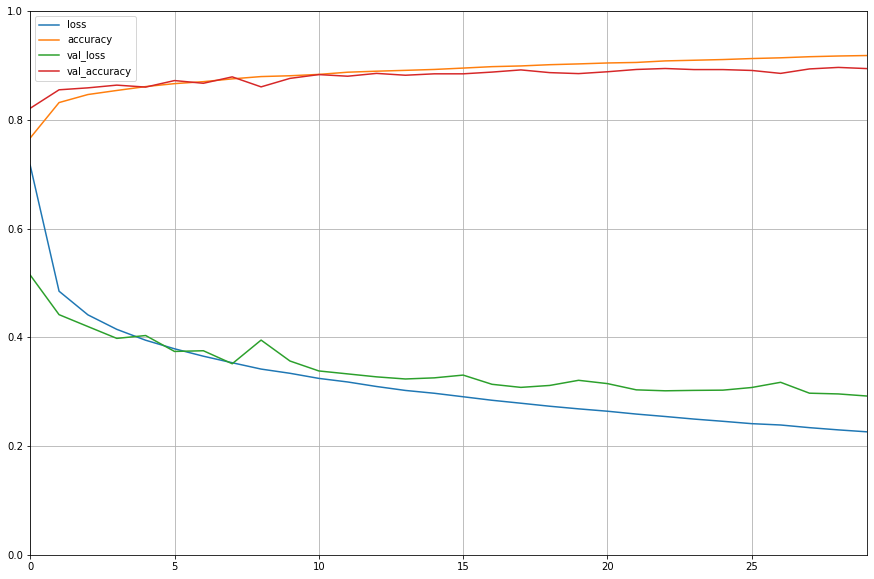

In [25]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Test on test set

In [26]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[70.59314069013595, 0.8401]

### Prediction

In [27]:
X_new=X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)